In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = (r'C:\Users\user\Desktop\Kaggle\netflix_titles.csv')

In [4]:
##Load datasets from my computer
df = pd.read_csv(data)

In [5]:
##checking the first 5 rows of the data if my coding is working
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
##numbers of row and column of the dataset
df.shape

(7787, 12)

In [7]:
## Checklist of the dataset
print("Total Number of Rows:", df.shape[0])
print("Total Number of Columns:", df.shape[1])
print("_" * 10)
## Duplicate records if any
print("Duplicated Record:", df.duplicated().any())
print("_" * 10)
print("missing Value:", df.isnull().values.sum())
print("\n")
print("Unique Values:\n\n ", df.nunique())
print("_" * 10)

print("MIssing rows in each columns: \n")

for i in df.columns:
    nullNum = df[i].isnull().sum()
    nullRate = nullNum / len(data) * 100
    if nullRate > 0:
        print(f"{i} {nullNum} ({nullRate:.2f}%)")

Total Number of Rows: 7787
Total Number of Columns: 12
__________
Duplicated Record: False
__________
missing Value: 3631


Unique Values:

  show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64
__________
MIssing rows in each columns: 

director 2389 (5082.98%)
cast 718 (1527.66%)
country 507 (1078.72%)
date_added 10 (21.28%)
rating 7 (14.89%)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
df["date_added"].value_counts().to_frame()

,date_added
"January 1, 2020",118
"November 1, 2019",94
"December 31, 2019",76
"March 1, 2018",76
"October 1, 2018",72
...,...
"June 29, 2015",1
"December 30, 2019",1
"June 2, 2016",1
"June 28, 2017",1


In [10]:
df["date_added"] = df["date_added"].fillna(df["date_added"].mode()[0])

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
df["date_added"].isnull().sum()

0

In [13]:
import re

months = {
    "January" : 1,
    "February" : 2,
    "March" : 3,
    "April" : 4,
    "May" : 5,
    "June" : 6,
    "July" : 7,
    "August" : 8,
    "September" : 9,
    "October" : 10,
    "November" : 11,
    "December" : 12
}
dateList = []
for i in df["date_added"].values:
    str1 = re.findall('([a-zA-Z]+)\s[0-9]+\,\s[0-9]+', i)
    str2 = re.findall('[a-zA-Z]+\s([0-9]+)\,\s[0-9]+', i)
    str3 = re.findall('[a-zA-Z]+\s[0-9]+\,\s([0-9]+)', i)
    date = '{}-{}-{}'.format(str3[0], months[str1[0]], str2[0])
    dateList.append(date)
    
df["date_added_cleaned"] = dateList
                           
                                           

In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_cleaned
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-8-14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-1-1


In [15]:
df = df.drop("date_added", axis = 1)

In [16]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added_cleaned
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-8-14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-1-1


In [17]:
df["date_added_cleaned"] = df["date_added_cleaned"].astype("datetime64[ns]")

In [18]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added_cleaned
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01


In [19]:
df["country"].value_counts().to_frame()

,country
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
...,...
"Hong Kong, Iceland, United States",1
"Iceland, Sweden, Belgium",1
"Mexico, Netherlands",1
"United States, Cambodia",1


In [21]:
for i, j in zip(df["country"].values, df.index):
    if i == np.nan:
        if("Anime" in df.loc[j, "listed_in"]) or ("anime" in df.loc[j, "listed_in"]):
            data.loc[j, "country"] = "Japan"
        else:
            continue
    else:
        continue
        
df["country"] = df["country"].fillna("Unknown")

In [22]:
df["country"].isnull().sum()

0

In [23]:
rating_order = df["rating"].value_counts().to_frame()

In [24]:
rating_order

,rating
TV-MA,2863
TV-14,1931
TV-PG,806
R,665
PG-13,386
TV-Y,280
TV-Y7,271
PG,247
TV-G,194
NR,84


In [27]:
df["rating"].isnull().sum()

7

In [28]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added_cleaned
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01


In [30]:
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])

In [31]:
df["rating"].isnull().sum()

0

In [32]:
df["director"].value_counts().to_frame()

,director
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
...,...
Jim Monaco,1
Anil Thomas,1
"Aleksandr Chernyaev, Fedor Lyass",1
Tolga Örnek,1


In [34]:
df["director"] = df["director"].fillna("Unknown")

In [36]:
df["director"].isnull().sum()

0

In [38]:
df["cast"].value_counts().to_frame()

,cast
David Attenborough,18
Samuel West,10
Jeff Dunham,7
"Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath",6
Craig Sechler,6
...,...
"Maika Monroe, Matt O'Leary, Arnar Jónsson, Gunnar Helgason, Berglind Rós Sigurðardóttir",1
"Alberto Ammann, Eloy Azorín, Verónica Echegui, Lucía Jiménez, Claudia Traisac",1
"Mason Dye, Ryan Munzert, Anthony Michael Hall, Amy Carlson, Katherine McNamara, Tyler Elliot Burke, Esther Zynn, Ryan Boudreau",1
"Fumino Kimura, Nozomi Sasaki, Mirai Shida, Elaiza Ikeda, Kaho, Yuki Yamada, Tomoya Nakamura, Kei Tanaka",1


In [39]:
df["cast"].isnull().sum()

718

In [41]:
df["cast"] = df["cast"].fillna("Unknown")

def cast_counter(cast):
    if cast == "Unknown":
        return 0
    else:
        castList = cast.split(', ')
        castLenght = len(castList)
        return castLenght
    
df["number_of_cast"] = df["cast"].apply(cast_counter)

In [43]:
df["cast"].isnull().sum()

0

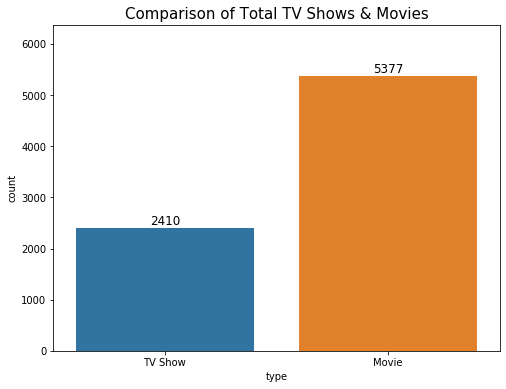

In [62]:
## Plot the bar chart for the number of movies and TV shows
plt.figure(figsize = (8, 6))
sns.countplot( x = "type", data = df)

## Get current axis on current figure
ax = plt.gca()

##The maximum scale of y-axis
y_max = df["type"].value_counts().max()

## Set the size of the box chart 
ax.set_ylim([0, y_max +1000])

##Iterate through the list of axes "patches"
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() /2., p.get_height(), '%d' % int(p.get_height()),
           fontsize = 12, color = "black", ha = "center", va = "bottom")

## Shows the result here and the size
plt.title("Comparison of Total TV Shows & Movies", size = "15")
plt.show()

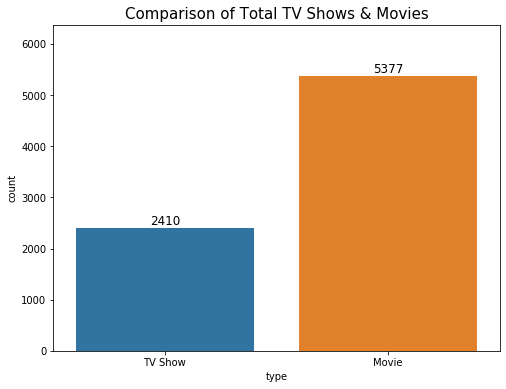

In [66]:
## Plot the bar chart for the number of movies and TV shows
plt.figure(figsize = (8, 6))
sns.countplot( x = "type", data = df)

## Get current axis on current figure
ax = plt.gca()

##The maximum scale of y-axis
y_max = df["type"].value_counts().max()

## Set the size of the box chart 
ax.set_ylim([0, y_max +1000])

##Iterate through the list of axes "patches"
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() /2., p.get_height(), '%d' % int(p.get_height()),
           fontsize = 12, color = "black", ha = "center", va = "bottom")

## Shows the result here and the size
plt.title("Comparison of Total TV Shows & Movies", size = "15")
plt.show()

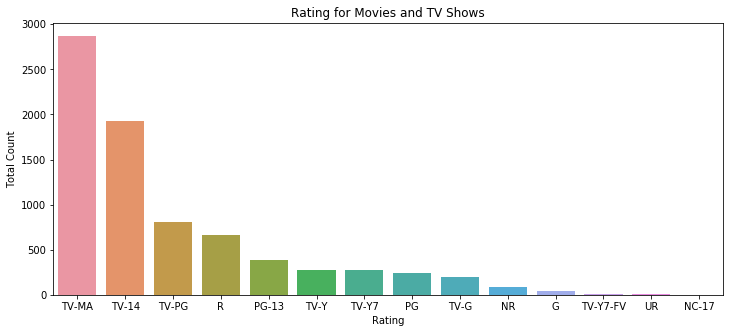

In [79]:
plt.figure(figsize = ( 12 ,5))

sns.countplot(df.rating, order = rating_order.index)
plt.title("Rating for Movies and TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")

plt.show()